# Binary-Insurance-Data-Analysis-and-Employee-Retention-Prediction

## Insurance

In [15]:
import polars as pl 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pl.read_csv('insurance_data.csv')
df 

age,bought_insurance
i64,i64
22,0
25,0
47,1
52,0
46,1
…,…
40,1
45,1
50,1


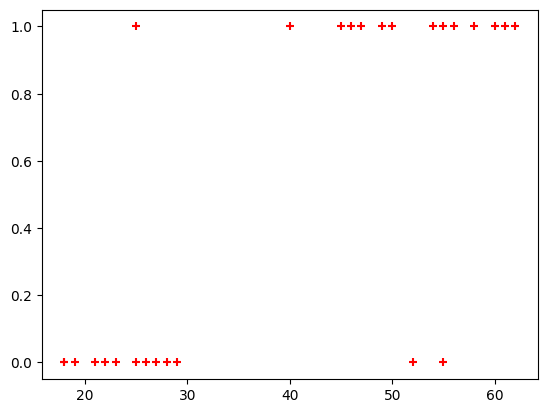

In [5]:
plt.scatter(df['age'], df['bought_insurance'], marker='+', color='red')

In [6]:
df.shape

(27, 2)

In [23]:
X = df[['age']]
y = df['bought_insurance']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [25]:
X_train

age
i64
18
21
29
61
62
…
52
45
40


In [26]:
X_test

age
i64
55
47
23


## Create and Train Model

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
model.predict(X_test)

array([1, 1, 0])

In [31]:
model.score(X_test, y_test)

1.0

In [32]:
model.predict_proba(X_test)

array([[0.12549039, 0.87450961],
       [0.28093941, 0.71906059],
       [0.88746213, 0.11253787]])

# Employee Retention

In [33]:
import pandas as pd
import polars as pl 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [77]:
df = pl.read_csv('HR_comma_sep.csv')
df 

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""
…,…,…,…,…,…,…,…,…,…
0.4,0.57,2,151,3,0,1,0,"""support""","""low"""
0.37,0.48,2,160,3,0,1,0,"""support""","""low"""
0.37,0.53,2,143,3,0,1,0,"""support""","""low"""


## Data Preprocessing

In [78]:
null_count = df.select([
    pl.col(c).is_null().sum().alias(c) for c in df.columns
])
null_count

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


## EDA

In [79]:
df['left'].unique()

left
i64
0
1


In [80]:
remained = df.filter([
    pl.col('left') == 0
])

remained

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.58,0.74,4,215,3,0,0,0,"""sales""","""low"""
0.82,0.67,2,202,3,0,0,0,"""sales""","""low"""
0.45,0.69,5,193,3,0,0,0,"""sales""","""low"""
0.78,0.82,5,247,3,0,0,0,"""sales""","""low"""
0.49,0.6,3,214,2,0,0,0,"""sales""","""low"""
…,…,…,…,…,…,…,…,…,…
0.9,0.55,3,259,10,1,0,1,"""management""","""high"""
0.74,0.95,5,266,10,0,0,1,"""management""","""high"""
0.85,0.54,3,185,10,0,0,1,"""management""","""high"""


In [81]:
resigned = df.filter([
    pl.col('left') == 1
])

resigned

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""
…,…,…,…,…,…,…,…,…,…
0.4,0.57,2,151,3,0,1,0,"""support""","""low"""
0.37,0.48,2,160,3,0,1,0,"""support""","""low"""
0.37,0.53,2,143,3,0,1,0,"""support""","""low"""


In [82]:
df.describe()

statistic,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
str,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""count""",14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,"""14999""","""14999"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268,null,null
"""std""",0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,null,null
"""min""",0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,"""IT""","""high"""
"""25%""",0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0,null,null
"""50%""",0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,null,null
"""75%""",0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0,null,null
"""max""",1.0,1.0,7.0,310.0,10.0,1.0,1.0,1.0,"""technical""","""medium"""


In [83]:
grouped_df = df.group_by('left').agg([
    pl.all().exclude('left').mean()  
])

grouped_df

left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
i64,f64,f64,f64,f64,f64,f64,f64,str,str
0,0.66681,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,null,null
1,0.440098,0.718113,3.855503,207.41921,3.876505,0.047326,0.005321,null,null


Observations:
1. Satisfaction level is higher (0.66681) in those who remained (0) than those who left.
2. Avg monthly hours is lower (199 hrs) in those who remained.
3. Promotion number is higher (0.026) in those who remained.
4. Higher work accident (0.175) in those who remained than those who left - why? Insurance claims dependent?


## Bar Charts

<Axes: xlabel='row_0'>

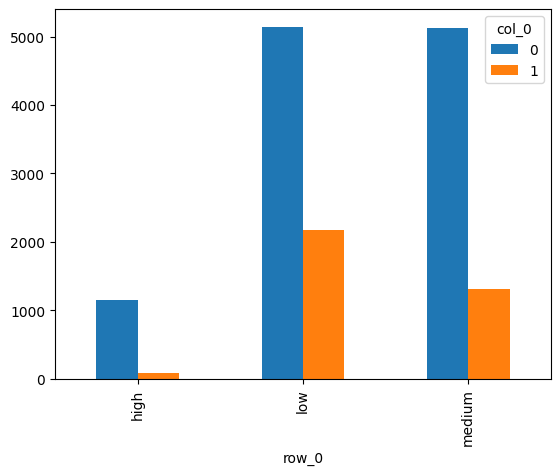

In [84]:
# Salary vs Retention
pd.crosstab(df['salary'], df['left']).plot(kind = 'bar')

<Axes: xlabel='row_0'>

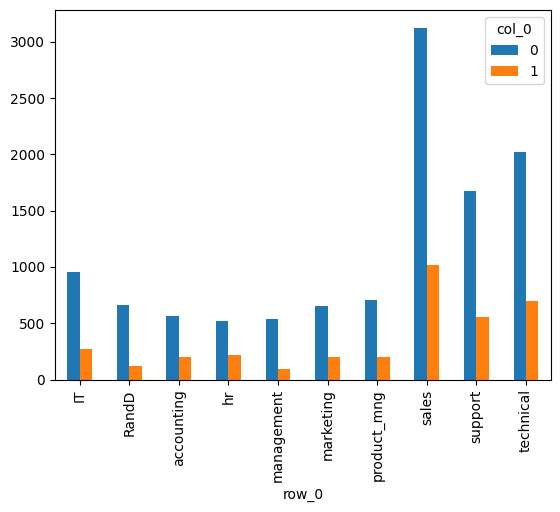

In [85]:
# Correlation between Department and Employee Retention
pd.crosstab(df['Department'], df['left']).plot(kind = 'bar')

## Build and Train Logistic Regression Model

In [86]:
df.head()

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
f64,f64,i64,i64,i64,i64,i64,i64,str,str
0.38,0.53,2,157,3,0,1,0,"""sales""","""low"""
0.8,0.86,5,262,6,0,1,0,"""sales""","""medium"""
0.11,0.88,7,272,4,0,1,0,"""sales""","""medium"""
0.72,0.87,5,223,5,0,1,0,"""sales""","""low"""
0.37,0.52,2,159,3,0,1,0,"""sales""","""low"""


In [87]:
# Observations:
# Satisfaction level is higher (0.66681) in those who remained (0) than those who left.
# Avg monthly hours is lower (199 hrs) in those who remained.
# Promotion number is higher (0.026) in those who remained.


X = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
y = df['left']

In [88]:
# Hot Encode salary col
X = X.to_dummies(columns=['salary'])
X 

satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
f64,i64,i64,u8,u8,u8
0.38,157,0,0,1,0
0.8,262,0,0,0,1
0.11,272,0,0,0,1
0.72,223,0,0,1,0
0.37,159,0,0,1,0
…,…,…,…,…,…
0.4,151,0,0,1,0
0.37,160,0,0,1,0
0.37,143,0,0,1,0


In [89]:
X = X.drop('salary_medium')
X 

satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
f64,i64,i64,u8,u8
0.38,157,0,0,1
0.8,262,0,0,0
0.11,272,0,0,0
0.72,223,0,0,1
0.37,159,0,0,1
…,…,…,…,…
0.4,151,0,0,1
0.37,160,0,0,1
0.37,143,0,0,1


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
X_train.shape

(10499, 5)

In [92]:
X_test.shape

(4500, 5)

In [93]:
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

LogisticRegression()

In [95]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
model.score(X_test, y_test)

0.7662222222222222